<a href="https://colab.research.google.com/github/Yash1289/play_store_data_Eda/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Any data scientist be it senior or junior spends almost 80% of its time on EDA , a process which includes cleaning and sorting the data and checking its feature correlation to weed out the noise and gain some insight as to what pieces are most useful

 **'The goal is to turn data into information and information into insight'**

This was said by Carly Fiorina , former CEO of Hewlett-Packard and with this same single view in mind we will also try to generate some useful information and insight from the database that we are going to work on over the course of this project 

At first we will go through our play store database and look for the factors that play a role in the engagement and success of an app and then we will go through our second database that is User reviews and look for any specific pattern in reviews wrote by the users while using various different apps





For this project we are going to use 

1.   Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
2.   Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
3.   Matplotlib :- Basic visualization library that we need for plotting and graphs
4.   Seaborn :- For more customizable and advanced data visualization





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [ ]:
#Mounting our google drive so we can acess the files in it through our google collab noteboook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the csv file from our database

file_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/Play Store Data.csv"
play_store_df = pd.read_csv(file_path)

### Now we will perform some basic data exploration such as


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and variables are in our dataset
*   We are also using info( ) to check the information about data and datatypes of each respective variable

All of this will help us to know our database better 

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_df.shape #As We can see we have in total 10841 observations and 13 variables

(10841, 13)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Checking out the list of variables we have in our dataset

play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Basic Data Cleaning to handle out the arbitary, duplicates as well as null and na values 

In [ ]:
#Dropping out the duplicate observations having the same app name

play_store_df.drop_duplicates(subset ="App" , keep="first",inplace=True ,ignore_index=True)

In [ ]:
play_store_df.shape #After dropping all the duplicates we have 9660 rows and 13 Columns

(9660, 13)

In [ ]:
#Filtering out the observations having app rating more than 5 

arbitary_ratings = play_store_df[play_store_df["Rating"] > 5]
arbitary_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As We can see above we have one app whose rating is more than 5 , and if we observe the data in this row more closely we can notice that the data of all the columns except "App" is shifted left by one place by one place in the row

In [ ]:
#Getting the index of the row with max rating 
index = play_store_df["Rating"].argmax() 
#Shifting the columns in the row except "App" by one place to the right
play_store_df.iloc[index , 1: ] = play_store_df.iloc[index , 1: ].shift()  

In [ ]:
#Changing the data type of Rating and Review column from String to float

play_store_df.loc[index , "Rating"] = float(play_store_df.loc[index ,"Rating"])
play_store_df.loc[index ,"Reviews"] = int(play_store_df.loc[index ,"Reviews"])

In [ ]:
play_store_df.iloc[index]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9300, dtype: object

In [ ]:
#Checking out the number of null values we have across different variables

play_store_df.isnull().sum()

App                  0
Category             1
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

As we can see above ,most of the null values in our dataset is from Rating column which has in total 1463 null values

To handle all these missing values we can take two kinds of approach
1. Replace all missing values with the mean values 
2. Replace all the missing values with the median values 

If our dataset have extreme outliers we will use the 2nd method and if not then we will move forward with the first approach.





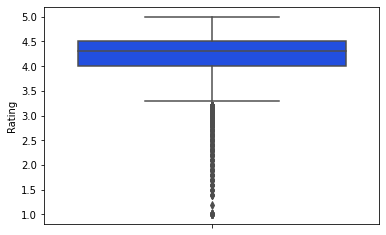

In [ ]:
sns.boxplot( y = "Rating" , data=play_store_df , palette="bright")

As we can see above we have huge numbers of outliers in our database i.e we have great number of apps whose rating is beyond the lower and upper extremes of first and third quartile respectively so we will replace na values with median instead of mean

In [ ]:
#Replacing na values of Rating with median values
play_store_df["Rating"] = np.where(play_store_df["Rating"].isna(), play_store_df["Rating"].median() , play_store_df["Rating"]  )

In [ ]:
#Changing the data type of Rating and Reviews column from string to float and int

play_store_df["Rating"] = play_store_df["Rating"].astype(float)
play_store_df["Reviews"] = play_store_df["Reviews"].astype(int)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 981.2+ KB


In [ ]:
#Checking out the unique values of installs we have in out dataframe

play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
def stringToInt(installs):
  ''' Function to Convert string values of installs to its numeric value'''
  if installs == "0":
    return int(installs)
  else :
    return int(installs[:-1].replace(",",""))

In [ ]:
#Changing the data type of Installs column from string to int 

play_store_df["Installs"] = play_store_df["Installs"].apply(stringToInt)

### Now as we are done with cleaning our data we will now move forward with our quest of finding the key factors which makes an app popular on google play store . As app success and engagement is our main priority so at times we will limit our data analysis only up until apps which have more than or equal to 1 million downloads

In [ ]:
#Filtering out apps having more than 1m download
apps_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]

In [ ]:
#Filtering out apps having more than 1m download
apps_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]

#Finding the highest rated apps across our google play store data that have more than 1m downloads
highest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].max()]
highest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
585,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
1029,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up
1031,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
1078,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
5963,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
8490,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device


One common pattern that is visible among is all these apps with the highest rating is that they all have a content rating of "Everyone" and it is something that we will explore more in detaill later down the line

In [ ]:
#Finding out the lowest Rated app having more than 1 million downloads
lowest_rated_apps = apps_with_1m_downloads[apps_with_1m_downloads["Rating"] == apps_with_1m_downloads["Rating"].min()]
lowest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4099,AppFinder by AppTap,TOOLS,2.0,2221,4.9M,5000000,Free,0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up


We all know that the bar on which any app's success is measured is its Rating, number of Installations and number of Reviews . So if we try to sort our dataset on basis on number of Installs and Reviews , then that will give us a very good idea about which apps are most Popular (if not most well received)  on play store

In [ ]:
#Trying to find the top 10 apps which are most installed and have the most number of reviews 
highest_installed_apps = apps_with_1m_downloads.sort_values(by =["Installs", "Reviews"] , ascending=[False, False] , ignore_index = True)[:10]
highest_installed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
7,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
8,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [ ]:
sns.barplot(x="Category" , data=highest_installed_apps)

In [ ]:
#Finding the most popular app across playstore based on number of reviews 
most_popular_app = play_store_df[play_store_df["Reviews"] == play_store_df["Reviews"].max()]
most_popular_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2002,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


**Facebook is the most popular app on playstore with the highest number of installs and reviews**

---



### After looking at the list of Best Rated and Most popular Apps it's time to look into what kind of apps are most well received i.e which category/genre of apps are more successful than other 

In [ ]:
#checking out the number of category we have in total in our dataset
play_store_d
f["Category"].nunique()

33

Text(0.5, 1.0, 'Percentage of apps across different Categories')

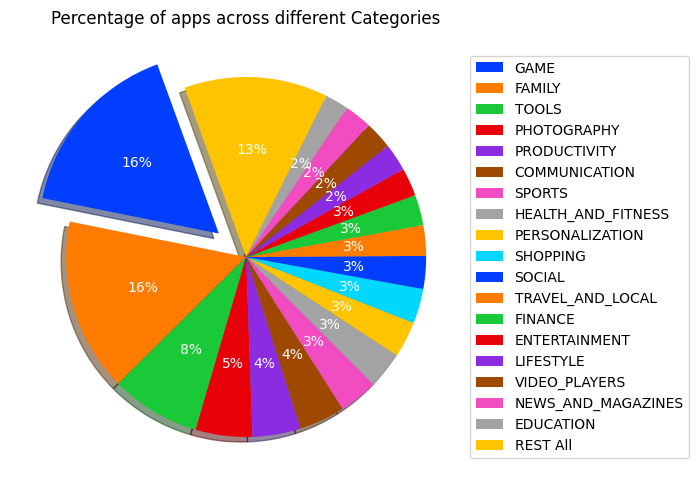

In [ ]:
#Finding out the number of apps that we have in each category bracket
category_wise_apps = apps_with_1m_downloads["Category"].value_counts()

#Making a list of all Categories
category_wise_apps_list = category_wise_apps.index.tolist()
#Making a list of count of apps that each category has 
category_wise_apps_count = list(category_wise_apps.values)

''' Plotting a pie chart to show the percentage of apps from each category that 
    we have in our apps with more than 1 million dataset, we will show individual
    pie pieces for top 18 categories and bundle out the rest into "Rest All" piece'''

slicingIndex = 18

category_wise_apps_list = category_wise_apps_list[:slicingIndex]
category_wise_apps_count_new = category_wise_apps_count[:slicingIndex]
sumofRest = sum(category_wise_apps_count[slicingIndex:])
category_wise_apps_list.append("REST All")
category_wise_apps_count_new.append(sumofRest)

totalCategories = len(category_wise_apps_count_new)

fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(category_wise_apps_count_new, explode=explode, labels = category_wise_apps_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, category_wise_apps_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Percentage of apps across different Categories")

The Above pie chart is indicating that Game and Family are the two major categories having the most number of apps with more than 1 Million Downloads . 

In [ ]:
# Number of apps count in each category across dataset
apps_count_across_all_category = play_store_df["Category"].value_counts()
#Number of apps count in each category across our filtered dataset of apps with more than 1m downloads
popular_apps_count_across_all_category = apps_with_1m_downloads["Category"].value_counts()

#Finding out the percentage of apps in 1m dataset from each category in reference to the total number of apps that each category have in the whole dataset
category_list = category_wise_apps.index.tolist()
apps_count_across_all_category = apps_count_across_all_category.values
popular_apps_count_across_all_category = popular_apps_count_across_all_category.values
percentage_of_apps_1m = (popular_apps_count_across_all_category/apps_count_across_all_category)*100
category_percentage_df = pd.DataFrame({'Category' : category_list ,"Percentage of apps in 1m" : list(percentage_of_apps_1m) } , columns = ["Category" , "Percentage of apps in 1m"])
category_percentage_df.sort_values(by="Percentage of apps in 1m" , ignore_index=True , ascending=False)[:10]

,Category,Percentage of apps in 1m
0,FAMILY,55.161627
1,PHOTOGRAPHY,41.190476
2,FOOD_AND_DRINK,41.176471
3,BOOKS_AND_REFERENCE,40.458015
4,BUSINESS,40.350877
5,NEWS_AND_MAGAZINES,38.356164
6,VIDEO_PLAYERS,37.837838
7,WEATHER,37.500000
8,COMMUNICATION,37.234043
9,PRODUCTIVITY,37.215190


The above dataframe shows that of the total number of apps that are of FAMILY category in our dataframe more than 50% of them have more than 1m downloads , so we can say that apps which are made for families have a higher success rate in terms of Installs

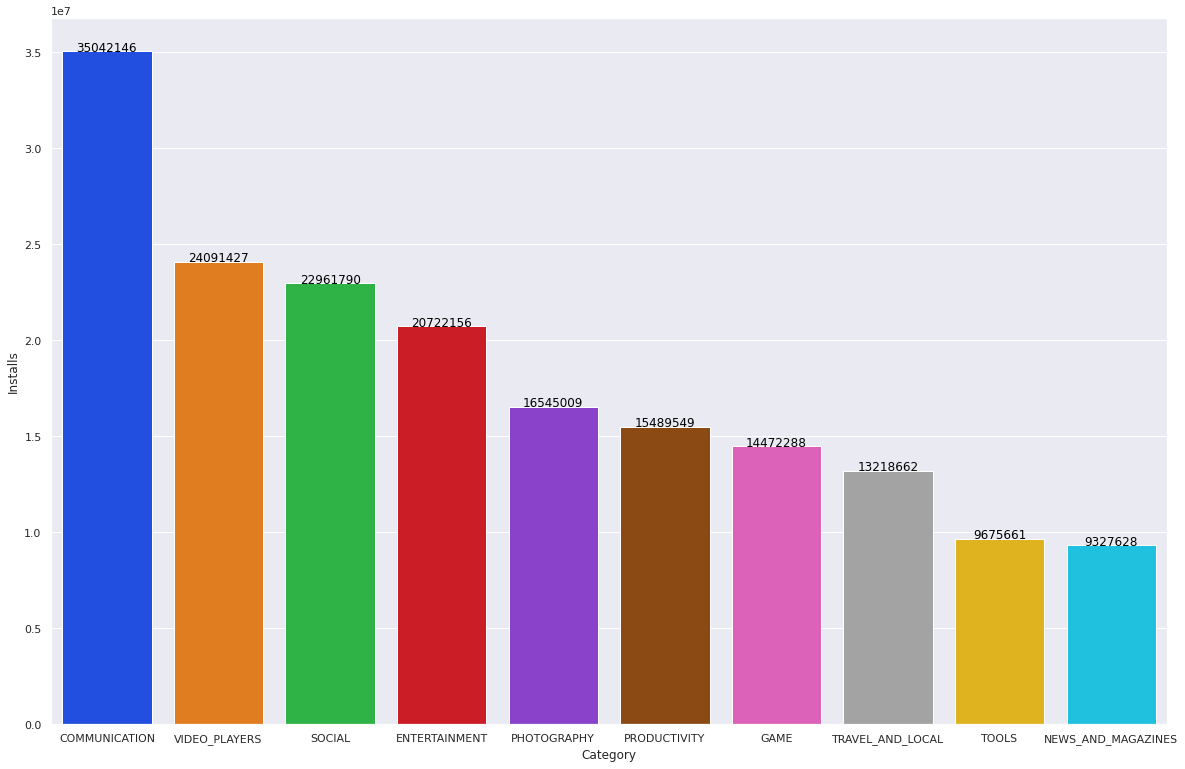

In [ ]:

#Grouping by category and finding the mean of installs across whole dataset 
installs_groupby = play_store_df.groupby("Category").agg({ "Installs" : "mean"}).reset_index().sort_values(by = "Installs" , ascending=False ,ignore_index=True)[:10]
installs_groupby["Installs"] = installs_groupby["Installs"].astype("int64")
installs_groupby

#Barplot showing average installs acorss different CAtegories
plt.rcParams['figure.figsize'] = 20,13
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Category',y='Installs',data = installs_groupby, palette = 'bright',estimator = np.mean)
for index, row in installs_groupby.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

Athough apps from communication category are less in number(as we saw in the pie chart)but they do have really huge value of average installs , further verifying the pattern that we saw while finding out the list of most popular apps in which we had almost 5 apps in top 10 from communication category . This says that if communication apps are well made they can be really popular

In [ ]:
#Grouping by Category and performing mean on Rating to find the mean rating of each category
ratings_groupby = play_store_df.groupby("Category").agg({"Rating" : "mean"}).reset_index().sort_values(by="Rating" , ignore_index="True" , ascending=False)
ratings_groupby[:5]


,Category,Rating
0,EVENTS,4.395313
1,EDUCATION,4.363866
2,ART_AND_DESIGN,4.354687
3,BOOKS_AND_REFERENCE,4.334234
4,PERSONALIZATION,4.325532


In [ ]:
#Grouping by category and performing max on number of Reviews to find the most popular app from each category
highest_across_category = play_store_df.groupby(["Category"]).agg({ "Reviews" : "max" , "App" : "first"}).reset_index().sort_values(by="Reviews" , ignore_index="True" , ascending=False)
highest_across_category[:5]

,Category,Reviews,App
0,SOCIAL,78158306,Facebook
1,COMMUNICATION,69119316,Messenger – Text and Video Chat for Free
2,GAME,44891723,ROBLOX
3,TOOLS,42916526,Moto File Manager
4,VIDEO_PLAYERS,25655305,YouTube


### Another factor that can decide the popularity of a certain app is the Content Rating that it carries and so it must be studied in detail that to what extent it affects an app's success

Text(0.5, 1.0, 'Percentage of Apps from each content rating')

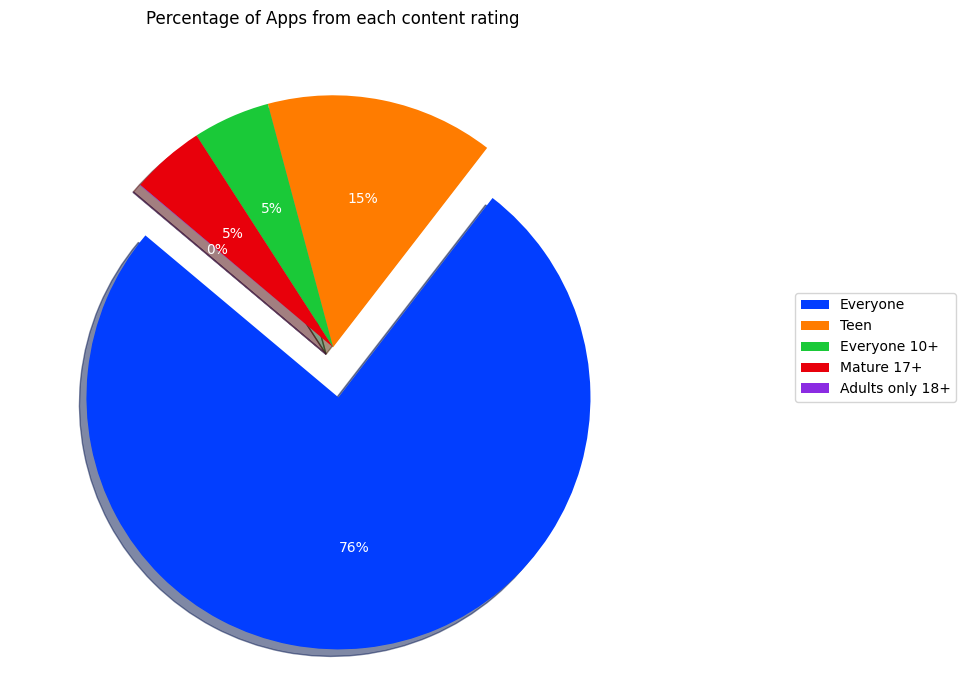

In [ ]:
#Finding out the number of apps that we have in each category bracket
content_rating_count = apps_with_1m_downloads["Content Rating"].value_counts()

#Making a list of all Categories
content_rating_list = content_rating_count.index.tolist()
#Making a list of count of apps that each category has 
content_rating_apps_count = content_rating_count.values

totalCategories = len(content_rating_list)

'''Plotting a pie chart to show the percentage of apps from each Content
   Rating with more than 1 million downloads'''

fig_1 = plt.figure(figsize=(10,7),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(content_rating_apps_count, explode=explode, labels = content_rating_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=140, 
                                    textprops=dict(color="w"))

plt.legend(wedges, content_rating_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Percentage of Apps from each content rating")

The pie chart makes it clear that majority of popular apps have a content Rating of everyone which means they are suitable for all age groups

Text(0.5, 1.0, 'Rating Distribution across different Content Rating')

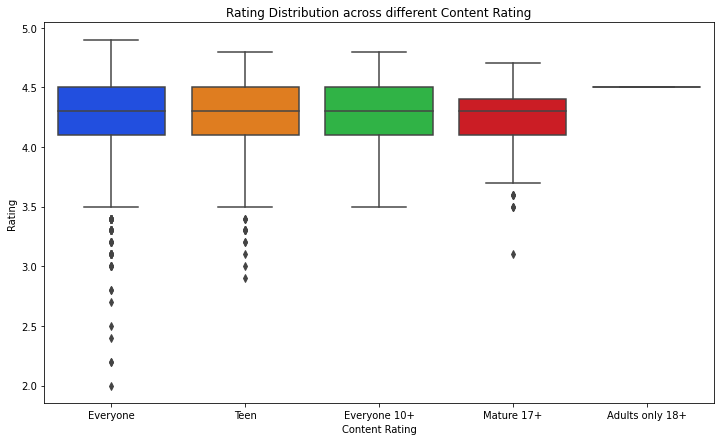

In [ ]:
#Plotting a boxplot using seaborn to show the pattern in rating across different Content Rating

plt.rcParams['figure.figsize'] = 12,7
ax = sns.boxplot(x="Content Rating" , y = "Rating" , data=apps_with_1m_downloads , palette="bright")
plt.title("Rating Distribution across different Content Rating")

In the boxplot we can notice that apps marked for Everyone have relatively higher extreme values and the one which are only for Mature 17+ consumers have a slightly lower value for third quartile which means they are not as highly rated as the other Content Rating brackets

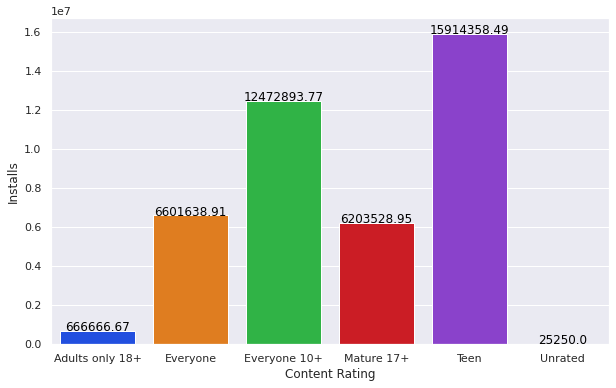

In [ ]:
#Grouping by Content Rating and performing mean on Installs to find the avg no. of installs across different Content Rating
content_installs_mean = play_store_df.groupby("Content Rating").agg({ "Installs" : "mean"}).reset_index()
content_installs_mean

#Plotting a bar chart to show the trend in avg installs across different Content Rating
plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Content Rating',y='Installs',palette = 'bright',data = content_installs_mean ,estimator = np.mean)
for index, row in content_installs_mean.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

The above bar chart is clearly indicating that apps made for teens are really popular and have much higher installation rates as compared to all other Content Rating

In [ ]:
##Grouping by category and performing max on number of Reviews to find the most popular app from each content Rating bracket
highest_installed_across_content = play_store_df.groupby("Content Rating").agg({ "Reviews" : "max" , "App" : "first"})
highest_installed_across_content

,Reviews,App
Content Rating,,
Adults only 18+,50017,Manga Master - Best manga & comic reader
Everyone,69119316,Photo Editor & Candy Camera & Grid & ScrapBook
Everyone 10+,44891723,Superheroes Wallpapers | 4K Backgrounds
Mature 17+,11667403,"Secrets of beauty, youth and health"
Teen,78158306,Sketch - Draw & Paint
Unrated,1186,Best CG Photography


In [ ]:
#Grouping by Content Rating and performing max on Reviews to find out the best rated app from each Content Rating
highest_rated_acorss_content = app_with_1m_downloads.groupby("Content Rating").agg({ "Rating" : "max" , "App" : "first" })
highest_rated_acorss_content

,Rating,App
Content Rating,,
Adults only 18+,4.5,DraftKings - Daily Fantasy Sports
Everyone,4.9,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Everyone 10+,4.8,Police Detector (Speed Camera Radar)
Mature 17+,4.7,Read books online
Teen,4.8,Sketch - Draw & Paint


## 2nd DataFrame

In [ ]:
#Reading the csv file from our database
file_path2 = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/User Reviews.csv"
app_review_df = pd.read_csv(file_path2)

### First we will perform some basic data exploration such as


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and variables are in our dataset
*   We are also using info( ) to check the information about data and datatypes of each respective variable

All of this will help us to know our database better 

In [ ]:
app_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
app_review_df.shape #we have in total 64295 rows and 5 variables

(64295, 5)

In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Basic Data Cleaning to handle out the arbitary, duplicates as well as null/na values

In [ ]:
#Dropping duplicate value from the dataframe based on the criteria of same apps as well as same translated review

app_review_df.drop_duplicates(subset=["App" , "Translated_Review"] , keep="first",inplace=True ,ignore_index=True)

In [ ]:
#Dropping rows that have null values in Translated_Review column

app_review_df.dropna(subset=["Translated_Review"], inplace=True)

In [ ]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 30674
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


### Now we will try to find out the apps having most number of translated Reviews and the general sentiment across some of the top apps 

In [ ]:
#Adding additonal count column to the dataset to indicate the total number of reviews any app in observation has
app_review_df["review_count"] = app_review_df.groupby('App')['App'].transform('count')
most_reviews_apps = app_review_df.sort_values(by="review_count" , ascending=False , ignore_index=True)
most_reviews_apps

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,review_count
0,Facebook,Well 3 days ago I searched marketplace second ...,Negative,-0.305000,0.470000,130
1,Facebook,Crashes hardly ever updates correctly,Negative,-0.291667,0.541667,130
2,Facebook,The best free,Positive,0.700000,0.550000,130
3,Facebook,Cant even open,Neutral,0.000000,0.500000,130
4,Facebook,Ever since last update load!,Neutral,0.000000,0.066667,130
...,...,...,...,...,...,...
29687,Discover Mobile,This extremely hit miss. The messaging never c...,Negative,-0.041667,0.527778,1
29688,Daily Workouts - Exercise Fitness Routine Trainer,It's really great,Positive,0.800000,0.750000,1
29689,Calculator - unit converter,Its great calculator India India different num...,Positive,0.183333,0.533333,1
29690,All-in-One Mahjong 3 FREE,Love I let go lack room phone,Positive,0.500000,0.600000,1


In [ ]:
#Finding out the most reviewed app 
most_reviewed_app = most_reviews_apps[most_reviews_apps["review_count"] == most_reviews_apps["review_count"].max()]
most_reviewed_app

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,review_count
0,Facebook,Well 3 days ago I searched marketplace second ...,Negative,-0.305000,0.470000,130
1,Facebook,Crashes hardly ever updates correctly,Negative,-0.291667,0.541667,130
2,Facebook,The best free,Positive,0.700000,0.550000,130
3,Facebook,Cant even open,Neutral,0.000000,0.500000,130
4,Facebook,Ever since last update load!,Neutral,0.000000,0.066667,130
...,...,...,...,...,...,...
125,Facebook,"This awesome, keeping connected friends family...",Positive,0.040000,0.600000,130
126,Facebook,Has marketplace icon account. Wife access acco...,Positive,0.016667,0.133333,130
127,Facebook,I updated Facebook still way find marketplace....,Positive,0.500000,0.500000,130
128,Facebook,Can please quit auto refresh irritating. I kno...,Positive,0.150000,0.543750,130


As we can see in our results above facebook is the most reviewed app and this is in sync with the results that we got from our first database

In [ ]:
#Importing wordcloud 
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Wordcloud of facebook reviews')

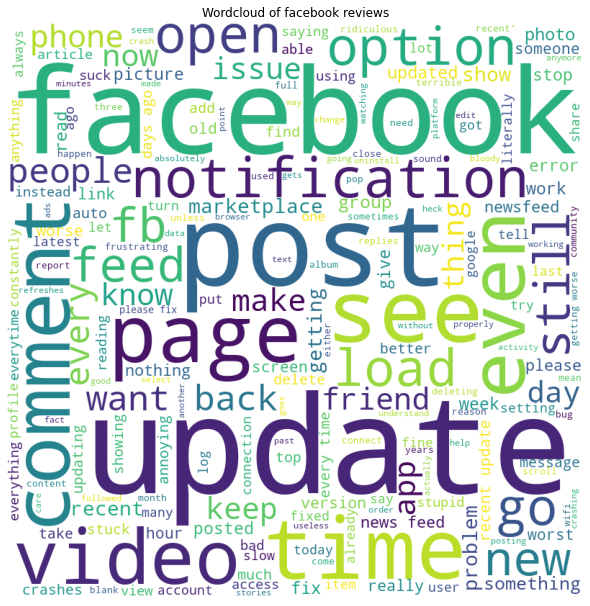

In [ ]:
#Making a wordcloud of all the reviews of Facebook to find something meaningful and important points from all the reviews

review_words= ""
stopwords = set(STOPWORDS)

for index,row in most_reviewed_app.iterrows():
  review_words += row["Translated_Review"]

review_words = review_words.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud of facebook reviews")

In [ ]:
#Grouping apps by App name and Sentiment 
app_groupby2 = most_reviews_apps.groupby(["App" , "Sentiment"] ,sort=False).agg({"Translated_Review" : "count"}).reset_index()[:15]

#Making a pivot table with all the sentiments as individual Columns to show the number of positive , negative and neutral reviews the top 5 apps have received
app_groupby2_pivot = app_groupby2.pivot(index="App" , columns="Sentiment" , values="Translated_Review")
app_groupby2_pivot

Sentiment,Negative,Neutral,Positive
App,,,
Angry Birds Classic,59,1,47
Episode - Choose Your Story,37,13,74
Facebook,59,18,53
Family Locator - GPS Tracker,7,13,85
Google Photos,24,1,76


Text(0.5, 1.0, 'Relative values of different sentiment for top 5 Apps')

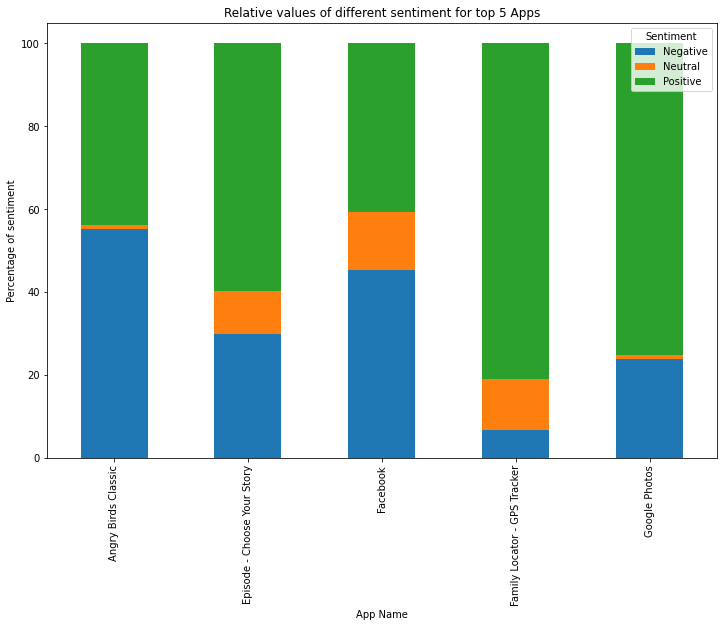

In [ ]:
#Changing the int values of sentiment to percent
app_groupby2_pivot = app_groupby2_pivot.apply(lambda x: x*100/sum(x), axis=1)

#Plotting a bar chart to show the relative values of positive, negative and neutral reviews the top 5 apps have received
app_groupby2_pivot.plot(kind="bar" , stacked=True , figsize=(12,8))
plt.xlabel("App Name")
plt.ylabel("Percentage of sentiment")
plt.title("Relative values of different sentiment for top 5 Apps")